Data preparation (10 points)
    Data exploration (10 points)
    Data visualization (10 points)
    Data scaling and comparisons (10 points)
    Insights from analysis (10 points)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
COVID_df= pd.read_csv("COVID-19-2020-06-20.csv")

In [5]:
# Data preparation and exploration (10 points)
print(COVID_df.shape)

(24344, 11)


From the above information, we know there are 11 different categories and 24,344 observation.

In [7]:
COVID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24344 entries, 0 to 24343
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  24344 non-null  object 
 1   day                      24344 non-null  int64  
 2   month                    24344 non-null  int64  
 3   year                     24344 non-null  int64  
 4   cases                    24344 non-null  int64  
 5   deaths                   24343 non-null  float64
 6   countriesAndTerritories  24344 non-null  object 
 7   geoId                    24246 non-null  object 
 8   countryterritoryCode     24344 non-null  object 
 9   popData2019              24344 non-null  int64  
 10  continentExp             24344 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


From the information above, we can see there is non-nullvalue. So, we don't have to deal with missing data on this data-set.

In [13]:
COVID_df.describe()

,day,month,year,cases,deaths,popData2019
count,24344.000000,24344.000000,24344.000000,24344.000000,24343.000000,2.434400e+04
mean,15.539312,4.056482,2019.997289,354.657328,18.977776,4.794805e+07
std,8.685040,1.528238,0.051999,2001.858275,122.140325,1.701245e+08
min,1.000000,1.000000,2019.000000,-2461.000000,0.000000,3.802000e+03
25%,8.000000,3.000000,2020.000000,0.000000,0.000000,1.920917e+06
50%,15.000000,4.000000,2020.000000,4.000000,0.000000,9.321023e+06
75%,23.000000,5.000000,2020.000000,64.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


When we look at the above data, we can not find any issue with the above categories besides the cases. When we look at the cases data, the max cases happened in one day is 54,771. However, there are some negative cases happened in one day, which is incorrect. There shouldn't have any negative cases happened in one day. In the cases category, the minimize case should be 0. We have two choices right now, 1. change the negative cases to positive, or 2. delete the negative cases because it is incorrect. Before making any decision, let us take a look at the negative cases. 

In [58]:
COVID_df_neg = COVID_df[COVID_df['cases'] < 0]
print(COVID_df_neg)

         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
2594   5/20/2020   20      5  2020   -209     0.0                   Benin   
6694   5/12/2020   12      5  2020    -50    18.0                 Ecuador   
6697    5/9/2020    9      5  2020  -1480    50.0                 Ecuador   
6699    5/7/2020    7      5  2020  -2461    49.0                 Ecuador   
8090    6/3/2020    3      6  2020   -766   107.0                  France   
11577  6/20/2020   20      6  2020   -148    47.0                   Italy   
13512  4/29/2020   29      4  2020   -105     3.0               Lithuania   
18233   5/3/2020    3      5  2020   -161    16.0                Portugal   
19305  5/11/2020   11      5  2020     -9     0.0              San_Marino   
20862  5/25/2020   25      5  2020   -372     NaN                   Spain   
20898  4/19/2020   19      4  2020   -713   410.0                   Spain   
22700   6/2/2020    2      6  2020     -1     0.0                  Uganda   

Form the above information, we can see some negative cases have death data. Therefore, I will keep the data and change the negative cases into positive caess.

In [62]:
COVID_df.at[[2594, 6694, 6697, 6699, 8090, 11577, 13512, 18233, 19305, 20862, 20898, 22700, 22712, 23069], 'cases'] 
= (209, 50, 1480, 2461, 766, 148, 105, 161, 9, 372, 713, 1, 115, 525)

Once replace the negative cases to positive case, we need to check the cases data again to see whether we have been suceesffully updated it, or not. 

In [63]:
COVID_df['cases'].min()

0

From the above, we can see the min cases is 0. 

In [80]:
# Add a new column for % of cases
COVID_df['% of cases'] = COVID_df['cases']/COVID_df['popData2019']*100
print(COVID_df)

         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      6/20/2020   20      6  2020    346     2.0             Afghanistan   
1      6/19/2020   19      6  2020    658    42.0             Afghanistan   
2      6/18/2020   18      6  2020    564    13.0             Afghanistan   
3      6/17/2020   17      6  2020    783    13.0             Afghanistan   
4      6/16/2020   16      6  2020    761     7.0             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
24339  3/25/2020   25      3  2020      0     0.0                Zimbabwe   
24340  3/24/2020   24      3  2020      0     1.0                Zimbabwe   
24341  3/23/2020   23      3  2020      0     0.0                Zimbabwe   
24342  3/22/2020   22      3  2020      1     0.0                Zimbabwe   
24343  3/21/2020   21      3  2020      1     0.0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  % of cases  
0 

In [81]:
# Add a new column for % of death
COVID_df['% of death']=COVID_df['deaths']/COVID_df['popData2019']*100
print(COVID_df)

         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      6/20/2020   20      6  2020    346     2.0             Afghanistan   
1      6/19/2020   19      6  2020    658    42.0             Afghanistan   
2      6/18/2020   18      6  2020    564    13.0             Afghanistan   
3      6/17/2020   17      6  2020    783    13.0             Afghanistan   
4      6/16/2020   16      6  2020    761     7.0             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
24339  3/25/2020   25      3  2020      0     0.0                Zimbabwe   
24340  3/24/2020   24      3  2020      0     1.0                Zimbabwe   
24341  3/23/2020   23      3  2020      0     0.0                Zimbabwe   
24342  3/22/2020   22      3  2020      1     0.0                Zimbabwe   
24343  3/21/2020   21      3  2020      1     0.0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  % of cases  \
0

In [82]:
COVID_df.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,% of cases,% of death
0,6/20/2020,20,6,2020,346,2.0,Afghanistan,AF,AFG,38041757,Asia,0.000910,0.000005
1,6/19/2020,19,6,2020,658,42.0,Afghanistan,AF,AFG,38041757,Asia,0.001730,0.000110
2,6/18/2020,18,6,2020,564,13.0,Afghanistan,AF,AFG,38041757,Asia,0.001483,0.000034
3,6/17/2020,17,6,2020,783,13.0,Afghanistan,AF,AFG,38041757,Asia,0.002058,0.000034
4,6/16/2020,16,6,2020,761,7.0,Afghanistan,AF,AFG,38041757,Asia,0.002000,0.000018


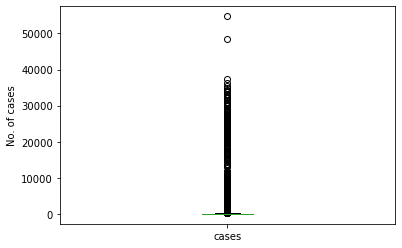

In [66]:
# Visualize the cases distribution
COVID_df['cases'].plot(kind='box')
plt.ylabel('No. of cases')
plt.show()

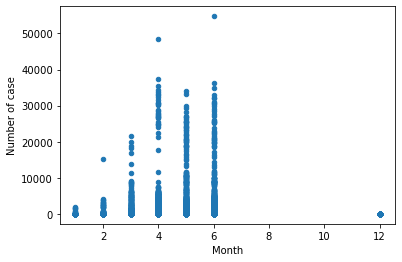

In [68]:
# Check on the case distribution on each month
COVID_df.plot(x='month', y='cases', kind='scatter')
plt.xlabel('Month')
plt.ylabel('Number of case')
plt.show()

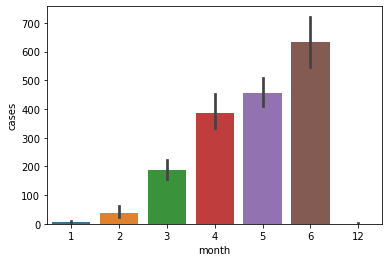

In [86]:
sns.barplot(x='month', y='cases', data=COVID_df)

From the above chart, we can see the no. of case per day is increasing month by month.

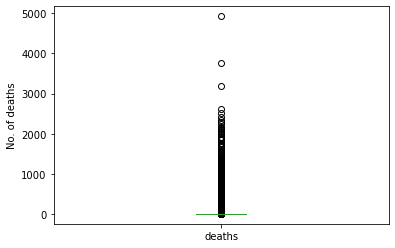

In [89]:
# Visualize the cases distribution
COVID_df['deaths'].plot(kind='box')
plt.ylabel('No. of deaths')
plt.show()

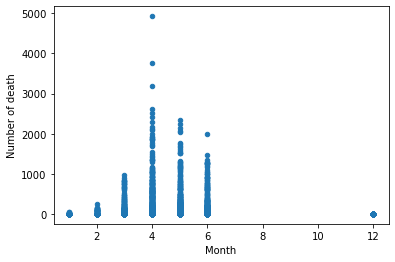

In [27]:
# Check on the deaths distribution on each month
COVID_df.plot(x='month', y='deaths', kind='scatter')
plt.xlabel('Month')
plt.ylabel('Number of death')
plt.show()

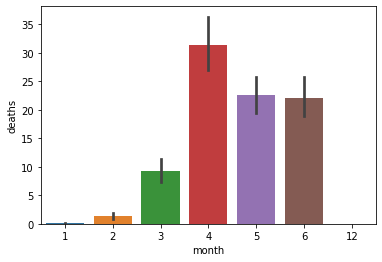

In [88]:
sns.barplot(x='month', y='deaths', data=COVID_df)

From the chart, we can see Apr. has the the highest no. of death per day, and the no. of death is gradually decreasing after Ar when the no. of case is increasing. So, we may conclude that country has better treatment to decrease the death effectively.   

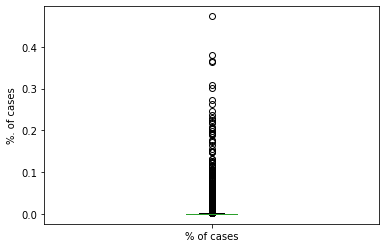

In [90]:
# Visualize the cases distribution
COVID_df['% of cases'].plot(kind='box')
plt.ylabel('%. of cases')
plt.show()

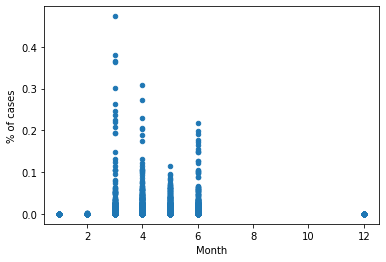

In [91]:
# Check on the deaths distribution on each month
COVID_df.plot(x='month', y='% of cases', kind='scatter')
plt.xlabel('Month')
plt.ylabel('% of cases')
plt.show()

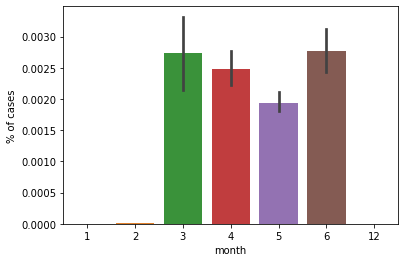

In [92]:
sns.barplot(x='month', y='% of cases', data=COVID_df)

We can see the % of case per day is pretty stable month by month. The % of case has been effectively controlled until May. We can see the % of case is increasing a lot compared with May.

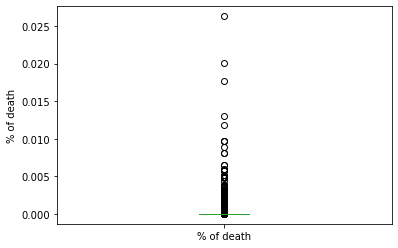

In [93]:
# Visualize the cases distribution
COVID_df['% of death'].plot(kind='box')
plt.ylabel('% of death')
plt.show()

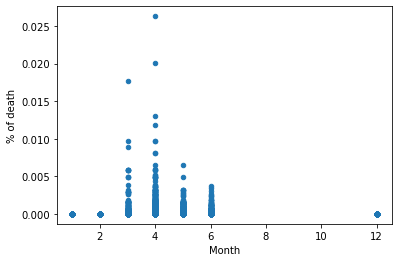

In [94]:
# Check on the deaths distribution on each month
COVID_df.plot(x='month', y='% of death', kind='scatter')
plt.xlabel('Month')
plt.ylabel('% of death')
plt.show()

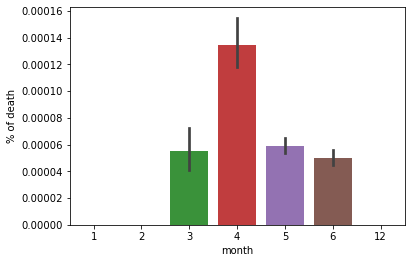

In [95]:
sns.barplot(x='month', y='% of death', data=COVID_df)

While looking at the % of death per day, we can see Apr has the highest % which is consistent with the no. of death. However, we know the % of case in June has incrased a lot compared with May, but the % of death in June doesn't reflect the same pattern. It might due to the timing difference. 

In [69]:
month_groupby=COVID_df.groupby(by='month')['cases'].agg(['sum'])
print(month_groupby)

           sum
month         
1         9799
2        74692
3       711040
4      2338519
5      2905852
6      2608079
12          27


Even June has the highest no. of case, the total case in June is not the highest which might due to the cut off date of this data. This data only contains the information up to June 20, 2020. It is not the full month of June. In order to better analyzing the data, we need to have the full month of data in June. 

In [100]:
country_groupby=COVID_df.groupby(by='countryterritoryCode')['cases'].agg(['sum'])
print(country_groupby)

                        sum
countryterritoryCode       
ABW                     101
AFG                   27878
AGO                     166
AIA                       3
ALB                    1838
...                     ...
XKX                    1486
YEM                     919
ZAF                   87715
ZMB                    1430
ZWE                     479

[206 rows x 1 columns]


In [104]:
country_groupby.describe()

,sum
count,2.060000e+02
mean,4.198062e+04
std,1.814438e+05
min,3.000000e+00
25%,2.992500e+02
50%,1.964500e+03
75%,1.708350e+04
max,2.220961e+06


In [114]:
# sort the country by no. of case
country_groupby.sort_values(by=['sum'])

,sum
countryterritoryCode,
AIA,3
LSO,4
BES,7
PNG,8
VGB,8
...,...
GBR,302865
IND,395048
RUS,569063


Based on the above information, we see USA has the most case in the world and Anguilla has the lowest no. of case in the world. The average case per coutry is 41,980. However, this number doesn't take the country population into cosideration. In order to be more objective to see each country performance while facing the COVID-19. We need to look at the of cases in stead of no. of case per country.

In [101]:
casep_groupby=COVID_df.groupby(by='countryterritoryCode')['% of cases'].agg(['sum'])
print(casep_groupby)

                           sum
countryterritoryCode          
ABW                   0.095255
AFG                   0.073283
AGO                   0.000522
AIA                   0.020172
ALB                   0.063799
...                        ...
XKX                   0.080529
YEM                   0.003151
ZAF                   0.149791
ZMB                   0.008006
ZWE                   0.003271

[206 rows x 1 columns]


In [118]:
casep_groupby.describe()

,sum
count,206.000000
mean,0.238713
std,0.691089
min,0.000091
25%,0.014041
50%,0.047791
75%,0.226375
max,6.657139


In [116]:
# sort the country by % of the case
casep_groupby.sort_values(by=['sum'])

,sum
countryterritoryCode,
PNG,0.000091
LSO,0.000188
LAO,0.000265
VNM,0.000362
AGO,0.000522
...,...
SMR,2.108434
LIE,2.183062
QAT,3.017650


Now, we look at the % of case per country, we can see LUX has the highest % of case per country, not USA. PNG has the lowest % of case per country, not AIA. From the above information, we can see the country has the highest no. of case doesn't necessary mean it has the highest % of case per country. Even thought, the USA has the highest no. of case in the world which doesn't mean it performs worest while preventing the COVID-19. 

In [102]:
deathp_groupby=COVID_df.groupby(by='countryterritoryCode')['% of death'].agg(['sum'])
print(deathp_groupby)

                           sum
countryterritoryCode          
ABW                   0.002829
AFG                   0.001441
AGO                   0.000025
AIA                   0.000000
ALB                   0.001458
...                        ...
XKX                   0.001788
YEM                   0.000861
ZAF                   0.003127
ZMB                   0.000062
ZWE                   0.000027

[206 rows x 1 columns]


In [103]:
deathp_groupby.describe()

,sum
count,206.000000
mean,0.007804
std,0.020729
min,0.000000
25%,0.000165
50%,0.001102
75%,0.004612
max,0.178650


In [117]:
# sort the country by % of the case
deathp_groupby.sort_values(by=['sum'])

,sum
countryterritoryCode,
LSO,0.000000
NAM,0.000000
PNG,0.000000
KNA,0.000000
SYC,0.000000
...,...
AND,0.067405
BEL,0.084632
PAN,0.114213


When we look at the % of death rate, we can see that LUX has the highest % of death rate and % of case per country. it seems that % of death rate and % of case might have certian correlation. We might need to dig into it.